In [ ]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import seaborn as sns
import math
from operator import itemgetter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the file Homework_sampledata1.txt from here (it is the same file from last week):

https://drive.google.com/file/d/1rjfXnAh_LT0zwidF40UTM8bP9_7BAI9O/view?usp=sharing

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2008.

#--------------------------#
#1. Histogram
#--------------------------#

1. Draw histogram from daily temperature data.
2. Perform a KDE with kernel = gausian and threshold = 1

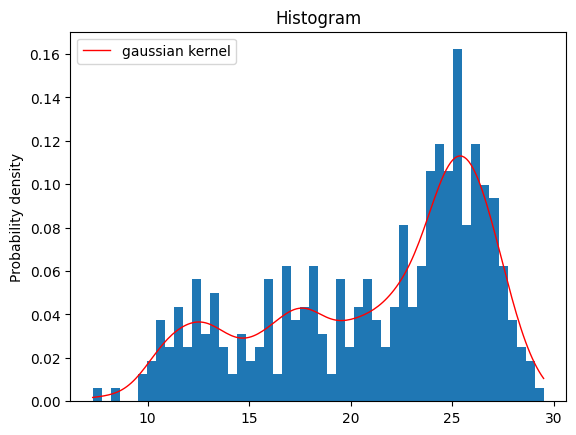

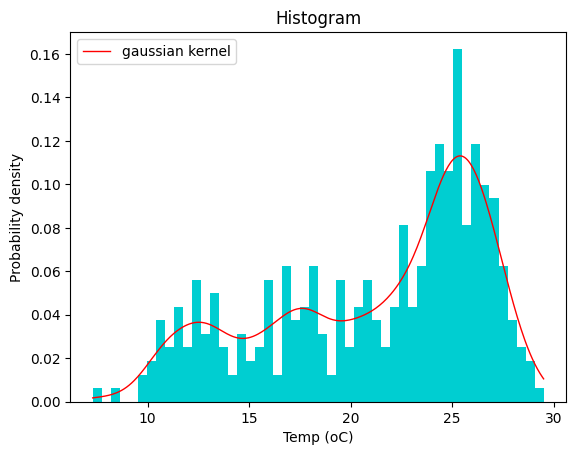

In [ ]:
#--------------------------#
#1. Histogram
#--------------------------#
#read file
df = pd.read_fwf('/content/drive/MyDrive/Data Visualization/Homework_sampledata1.txt', sep = '\s+')
df = df.set_index('2008')
months = [date(2008,m,1).strftime('%b') for m in range(1,13)]
df.columns = months

#remove nan value
df = df.replace(-99.0, np.nan)
df_list = [df[i] for i in df.columns]
df_list = list(df_list)
flatten = [item for sublist in df_list for item in sublist]
new_flatten = [i for i in flatten if math.isnan(i) == False]

#plot histogram
plt.figure()
plt.hist(new_flatten,50,range=(min(new_flatten),max(new_flatten)), density = True, color = 'darkturquoise')
plt.title('Histogram')
plt.xlabel('Temp (oC)')
plt.ylabel('Probability density')

#perform kde
kde = KernelDensity(kernel = 'gaussian', bandwidth = 1).fit(np.array(new_flatten).reshape(-1,1))
x_axis = np.linspace(np.min(new_flatten), np.max(new_flatten), 361)
log_dens = kde.score_samples(x_axis.reshape(-1,1))

#plot kde
plt.plot(x_axis, np.exp(log_dens),color='r',lw=1,linestyle='-',label='gaussian kernel')
plt.xticks([10,15,20,25,30])
plt.ylim((0,0.17))
plt.legend()
plt.show()

#--------------------------#
#2. Box plot
#--------------------------#

3. Draw 12 box plots coresponding to 12 months
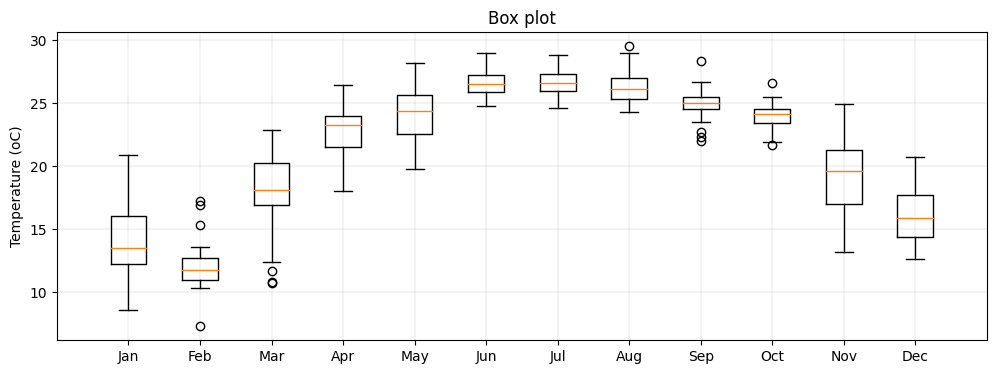

Text(0.5, 0, 'Times')

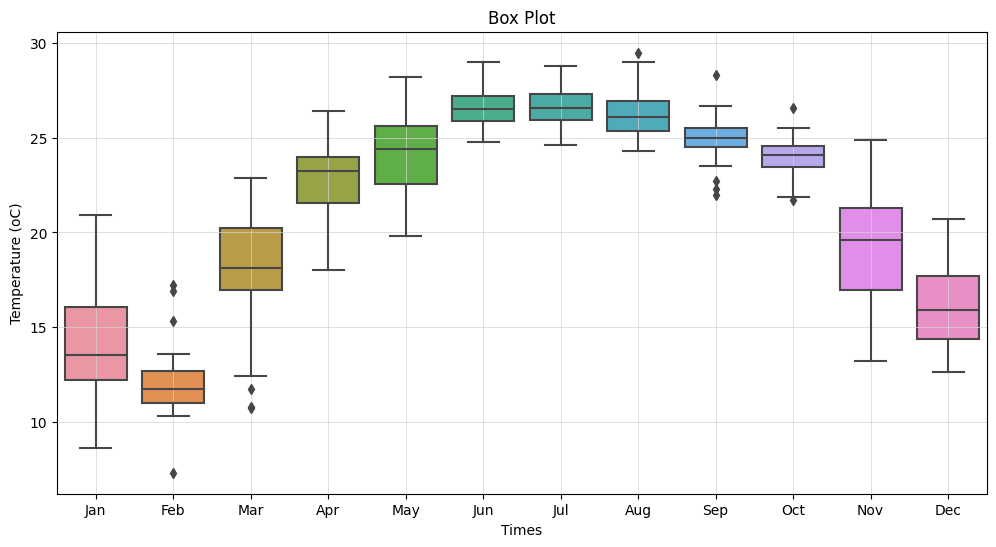

In [ ]:
#--------------------------#
#2. Box plot
#--------------------------#
fig,ax = plt.subplots(figsize = (12,6))
fig = sns.boxplot(df, ax=ax)
ax.grid(linewidth=0.5, color = 'lightgrey')
ax.set_xticklabels(labels = df.columns)
ax.set_title('Box Plot')
ax.set_ylabel('Temperature (oC)')
ax.set_xlabel('Times')

#--------------------------#
#3. Violin plot
#--------------------------#
4. Do similarly for violin plot
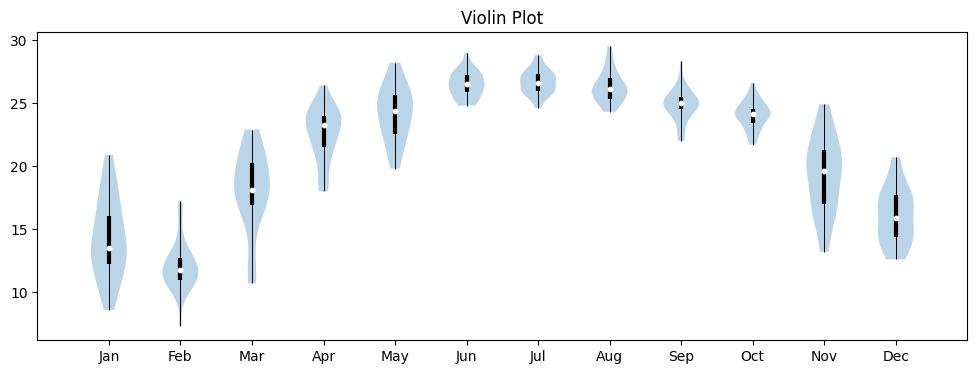

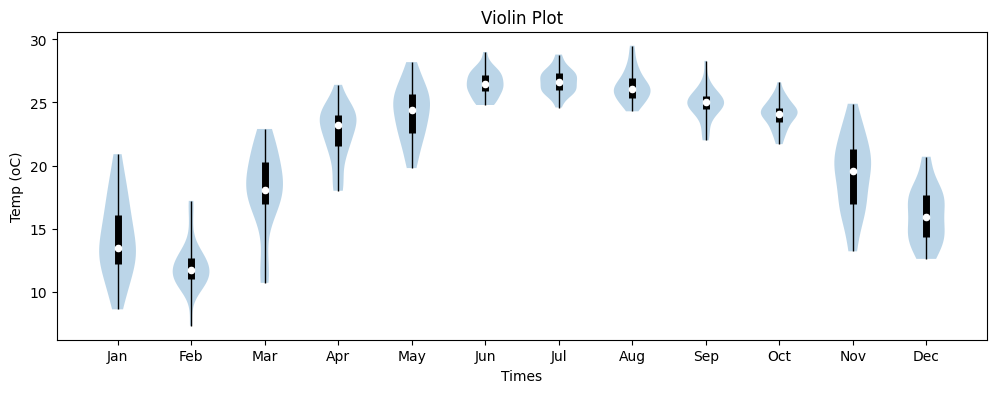

In [ ]:
#--------------------------#
#3. Violin plot
#--------------------------#

#list in list
new_list = []
for i in range(len(df_list)):
    withou_nan = [x for x in df_list[i] if not math.isnan(x)]
    new_list.append(withou_nan)
len(new_list)

#plot
plt.figure(figsize=(12,4))
plt.violinplot(new_list,showmeans = False,showmedians=False,showextrema=False)

for i in range(len(new_list)):
    plt.vlines(i+1,np.percentile(new_list[i],25), np.percentile(new_list[i],75), color = 'k', linestyle= '-', lw=5)
    plt.vlines(i+1,np.min(new_list[i]), np.max(new_list[i]), color = 'k', linestyle = '-', lw = 1)
    plt.scatter(i+1,np.median(new_list[i]), marker = 'o', color = 'white', s= 20,zorder=3)
plt.xticks(range(1,13),df.columns)
plt.title('Violin Plot')
plt.ylabel('Temp (oC)')
plt.xlabel('Times')
plt.show()

#--------------------------#
#4. Error bar
#--------------------------#
5. Plot the monthly mean temperature and the error bar. The error bar is defined as +-1 standard deviation from the mean value.
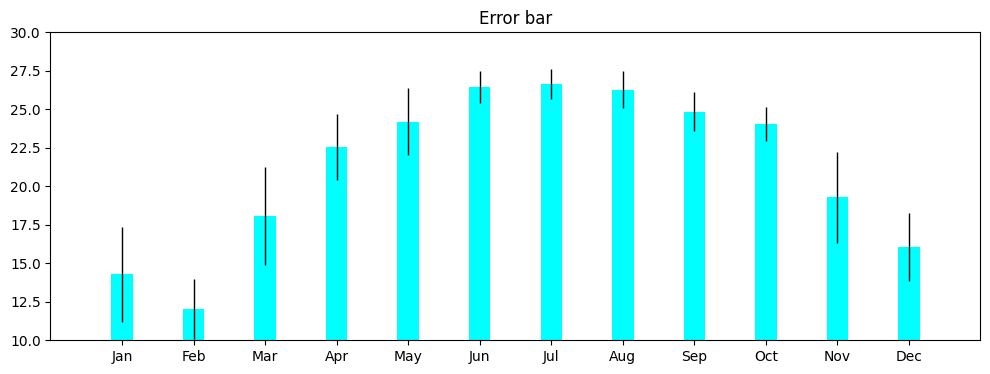

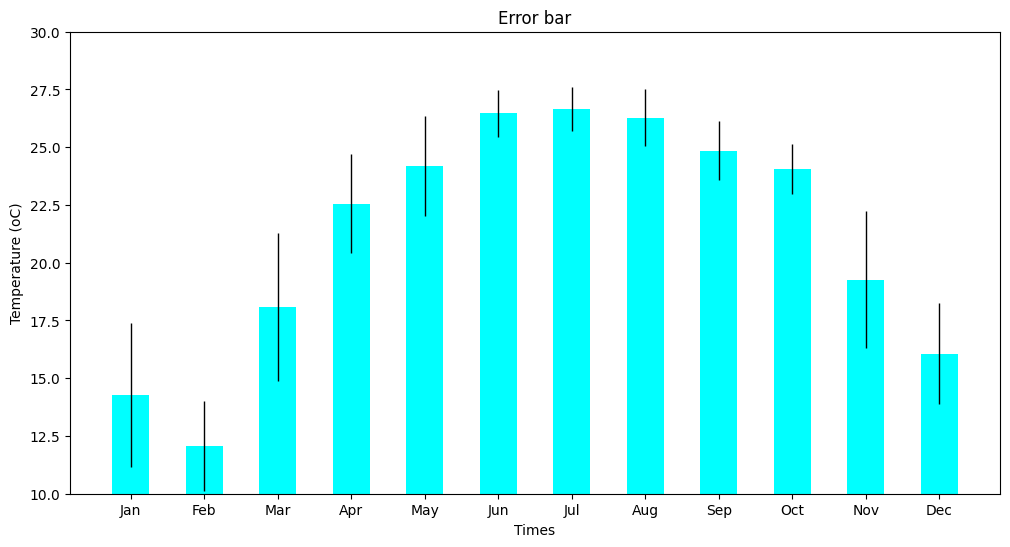

In [ ]:
#--------------------------#
#4. Error bar
#--------------------------#
mean= [np.nanmean(df_list[i].tolist()) for i in range(len(df_list))]
std= [np.nanstd(df_list[i].tolist()) for i in range(len(df_list))]
subtract = list(map(lambda a, b: a - b, mean,std))
add = list(map(lambda a, b: a + b, mean,std))

plt.figure(figsize=(12,6))
plt.bar(months,mean,width = 0.5, color = 'aqua')

plt.vlines(months, subtract, add,color='k', linestyle='-', lw=1)
plt.ylim((10,30))
plt.title('Error bar')
plt.ylabel('Temperature (oC)')
plt.xlabel('Times')
plt.show()

---
#--------------------------#
#5. Bar plot - a ranking problem
#--------------------------#
Let's imagine that we have 45 students.
In the final exam, we have math and literature score.

The math score is equal to mid_term * 40% + final * 60%.
Same for the literature score.

The final score is the average of the literature score and math score.

Now, we want to plot the score of each student. However, we want to see the score descending (meaning that the student with highest score will stay on top).

Also, we would like to know more about the top 10 students. Therefore, for the first 3 highest overal rank students, highlight the math and literature score with 1,2, and 3. From 4-10, highlight the component score with a star (*). The student ID is displayed in the left hand of the score bar. The use of panda library is prohibited.

Input file:

(each file has 2 columns, the first column is the midterm score, the second column is the final score)

Literature score:

https://drive.google.com/file/d/1ZTUb80rozqXNj3eC8XSzv0Fc3ytsL8pT/view?usp=sharing

Math score:

https://drive.google.com/file/d/1cn_2wTLzGO45adLCSzqbCbQ6I-U8xtgC/view?usp=sharing

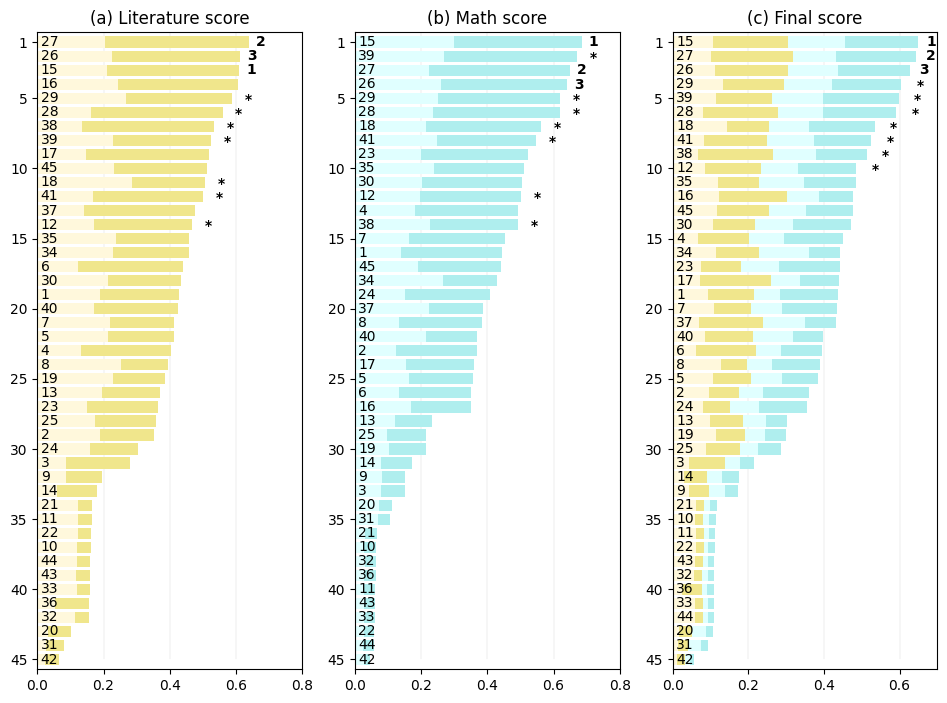

In [ ]:
#--------------------------#
#5. Bar plot - a ranking problem
#--------------------------#
#read file
def calculate_score(path):
    with open(path, 'r') as f:
        col_1 = []
        col_2 = []
        lines = [line.strip() for line in f if line]
        for line in lines:
            sline = line.split(' ')
            col_1.append(float(sline[0]))
            col_2.append(float(sline[1]))
    return [col_1,col_2]

literature_score = calculate_score('/content/drive/MyDrive/Data Visualization/HW2_literature_score.txt')
math_score = calculate_score('/content/drive/MyDrive/Data Visualization/HW2_math_score.txt')

#a dictionary of all score
final_score = []
for i in range(len(literature_score[0])):
    score = {
        'id': i + 1,
        'literature_mid': literature_score[0][i]*0.4,
        'literature_final': literature_score[1][i]*0.6,
        'literature_score': literature_score[0][i]*0.4 + literature_score[1][i]*0.6,
        'math_mid':math_score[0][i]*0.4,
        'math_final':math_score[1][i]*0.6,
        'math_score': math_score[0][i]*0.4 + math_score[1][i]*0.6,
        'average_score': ((literature_score[0][i]*0.4 + literature_score[1][i]*0.6) + (math_score[0][i]*0.4 + math_score[1][i]*0.6))/2
    }
    final_score.append(score)

#sort dictionary
sorted_literature = sorted(final_score, key = itemgetter('literature_score'), reverse = True)
sorted_math = sorted(final_score, key = itemgetter('math_score'), reverse = True)
sorted_final = sorted(final_score, key = itemgetter('average_score'), reverse = True)

#id of top 10 student
top_student = []
for i in range(10):
    top_student.append(sorted_final[i]['id'])

# ist of literature score
literature_id = np.ravel([sorted_literature[i]['id'] for i in range(len(sorted_literature))])
literature_mid = np.ravel([sorted_literature[i]['literature_mid'] for i in range(len(sorted_literature))])
literature_final = np.ravel([sorted_literature[i]['literature_final'] for i in range(len(sorted_literature))])

#list of math score
math_id = np.ravel([sorted_math[i]['id'] for i in range(len(sorted_math))])
math_mid = np.ravel([sorted_math[i]['math_mid'] for i in range(len(sorted_math))])
math_final = np.ravel([sorted_math[i]['math_final'] for i in range(len(sorted_math))])

#list of final score
final_lit_mid = np.ravel([sorted_final[i]['literature_mid']/2 for i in range(len(sorted_final))])
final_lit = np.ravel([sorted_final[i]['literature_final']/2 for i in range(len(sorted_final))])
final_math_mid = np.ravel([sorted_final[i]['math_mid']/2 for i in range(len(sorted_final))])
final_math = np.ravel([sorted_final[i]['math_final']/2 for i in range(len(sorted_final))])
fin_sum = np.ravel([sorted_final[i]['average_score'] for i in range(len(sorted_final))])
final_id = np.ravel([sorted_final[i]['id'] for i in range(len(sorted_final))])

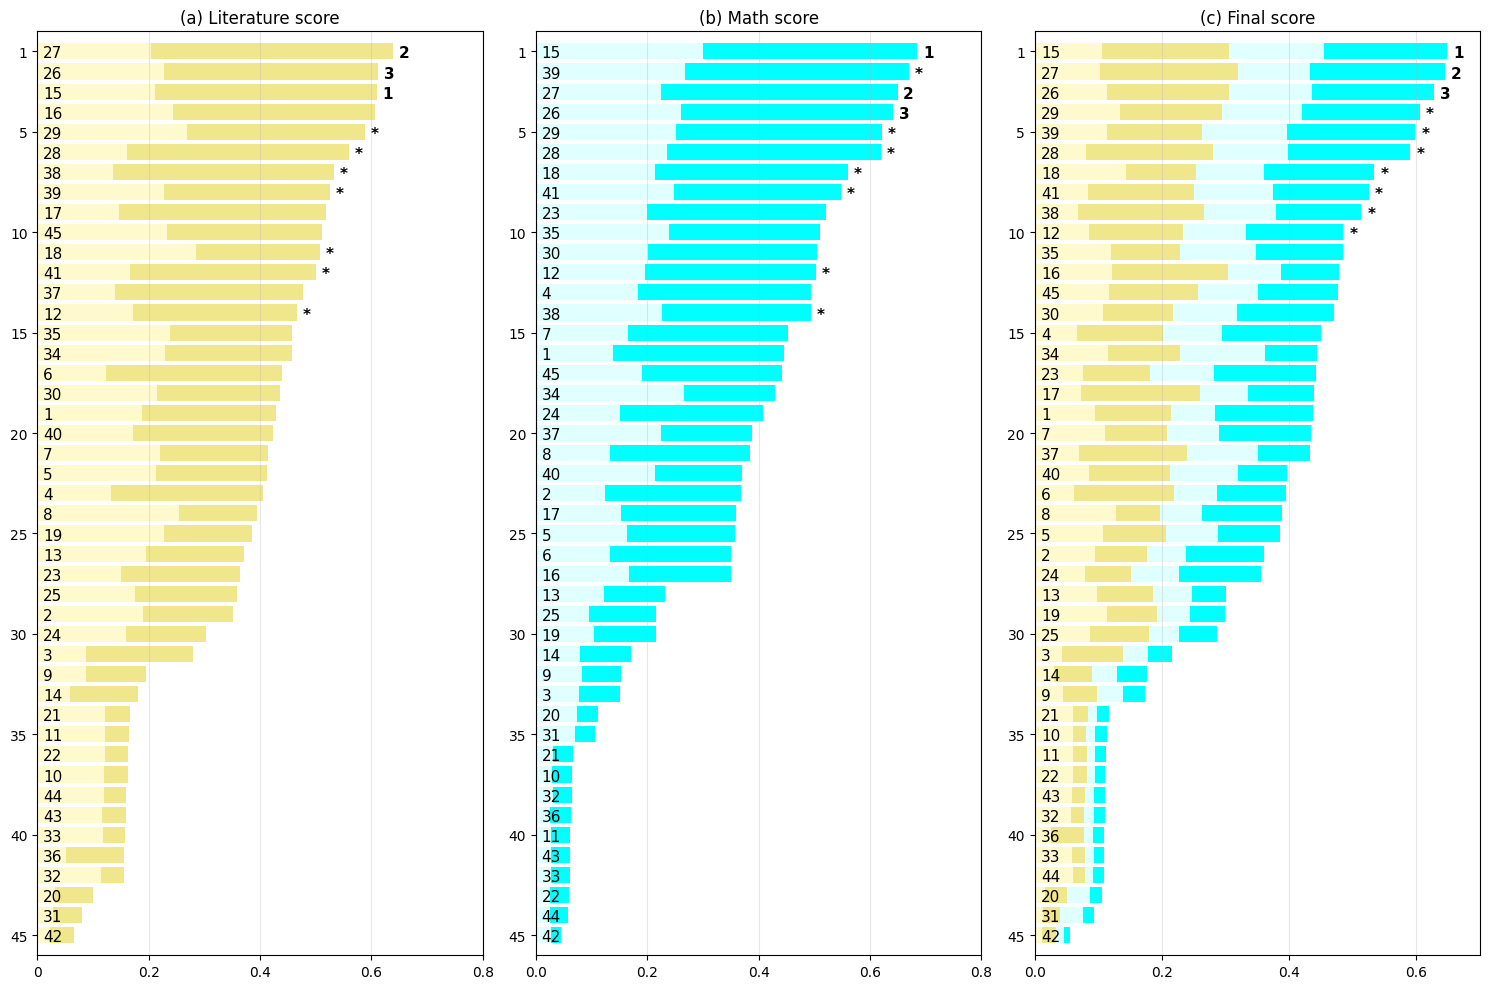

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))

#first subplot
for i, j in enumerate(literature_id):
    ax1.barh(i+1,literature_mid[i], color = 'lemonchiffon')
    ax1.barh(i+1,literature_final[i], color = 'khaki', left = literature_mid[i])
    ax1.text(0.01, i + 1.3, j, size=11, color='black')
    if (j in top_student[:3]):
        index = top_student.index(j)
        ax1.text(literature_mid[i] + literature_final[i] + 0.01, i+1.3, index+1, color = 'black', size=11, fontweight='bold')
    if (j in top_student[3:]):
        ax1.text(literature_mid[i] + literature_final[i] + 0.01, i+1.3, '*', color = 'black', size=11,fontweight='bold')
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax1.set_yticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45])
ax1.set_yticklabels([1, 5, 10, 15, 20, 25, 30, 35, 40, 45])
ax1.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8])
ax1.grid(axis='x', alpha=0.3)
ax1.set_ylim(0, 46)
ax1.set_xlim(0,0.8)
ax1.set_title('(a) Literature score')
ax1.invert_yaxis()

#2nd subplot
for i, j in enumerate(math_id):
    ax2.barh(i+1,math_mid[i], color = 'lightcyan')
    ax2.barh(i+1,math_final[i], color = 'cyan', left = math_mid[i])
    ax2.text(0.01, i + 1.3, j, size=11, color='black')
    if (j in top_student[:3]):
        index = top_student.index(j)
        ax2.text(math_mid[i] + math_final[i] + 0.01, i+1.3, index+1, color = 'black', size=11,fontweight='bold')
    if (j in top_student[3:]):
        ax2.text(math_mid[i] + math_final[i] + 0.01, i+1.3, '*', color = 'black', size=11,fontweight='bold')
ax2.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax2.set_yticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45])
ax2.grid(axis='x', alpha=0.3)
ax2.set_ylim(0, 46)
ax2.set_xlim(0,0.8)
ax2.set_title('(b) Math score')
ax2.invert_yaxis()

#3rd subplot
for i, j in enumerate(final_id):
    ax3.barh(i+1,final_lit_mid[i], color = 'lemonchiffon')
    ax3.barh(i+1,final_lit[i], color = 'khaki', left = final_lit_mid[i])
    ax3.barh(i+1,final_math_mid[i], color = 'lightcyan', left=final_lit[i]+final_lit_mid[i])
    ax3.barh(i+1,final_math[i], color = 'cyan', left = final_lit[i]+final_lit_mid[i]+final_math_mid[i])
    ax3.text(0.01, i + 1.3, j, size=11, color='black')
    if (j in top_student[:3]):
        ax3.text(final_lit[i]+final_lit_mid[i]+final_math_mid[i]+final_math[i] + 0.01, i+1.3, i+1, color = 'black', size=11,fontweight='bold')
    if (j in top_student[3:]):
        ax3.text(final_lit[i]+final_lit_mid[i]+final_math_mid[i]+final_math[i] + 0.01, i+1.3, '*', color = 'black', size=11,fontweight='bold')
ax3.set_xticks([0, 0.2, 0.4, 0.6])
ax3.set_yticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45])
ax3.grid(axis='x', alpha=0.3)
ax3.set_ylim(0, 46)
ax3.set_xlim(0,0.7)
ax3.set_title('(c) Final score')
ax3.invert_yaxis()

plt.tight_layout()
plt.show()

#--------------------------#
#6. Do the homework 1 again, without using panda
#--------------------------#

Please download the file  Homework_sampledata1.txt from here:

https://drive.google.com/file/d/1rjfXnAh_LT0zwidF40UTM8bP9_7BAI9O/view?usp=sharing

In this file, the first line show the year of the observation.
Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2008.

Your task is:
1. Plot the daily temperature from 01 Jan 2008 to 31 Dec 2008.

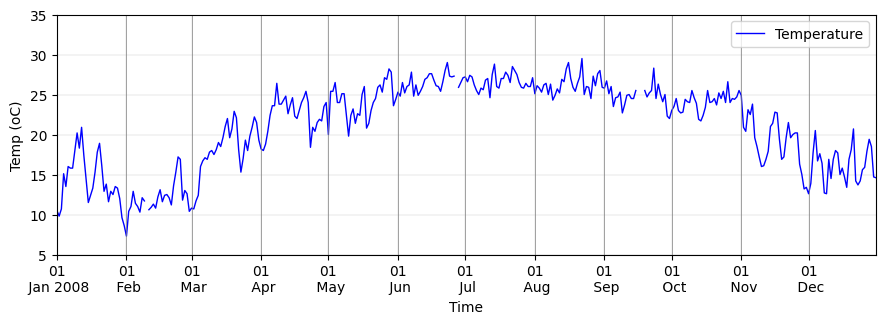

2. Calculate the monthly mean in 2008. Please note that the days in different months are different

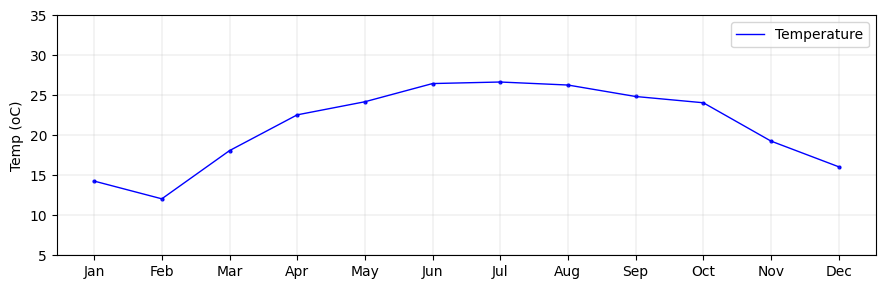

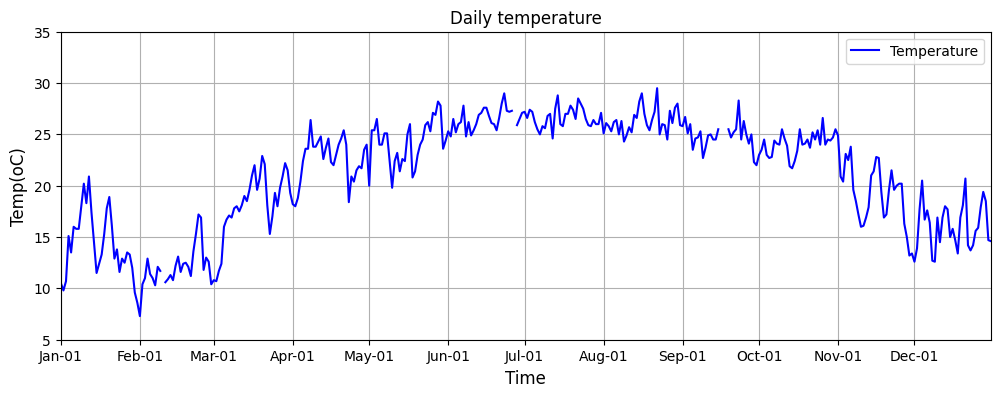

In [ ]:
#--------------------------#
#6. Homework 1 without panda
#--------------------------#
#Exercise 1
#read file
with open('/content/drive/MyDrive/Data Visualization/Homework_sampledata1.txt', 'r') as f:
    lines = f.readlines()
    col = []
    for line in lines:
        col.append(line.strip().split())

#list of value
new_list = []
year = col[0]
day = []
for i in range(len(col)):
    new_col = [float(j) for j in col[i]]
    day.append(new_col[0])
    del new_col[0]
    new_list.append(new_col)
del new_list[0]

columns = [list(index) for index in zip(*new_list)]

#replace -99.0 to nan
with_nan = []
for i in range(len(columns)):
    nan = np.where(np.array(columns[i]) == -99.0, np.nan,columns[i])
    with_nan.append(nan)

#remove nan
value_list = []
for i in range(len(with_nan)):
    l = with_nan[i].tolist()
    if (math.isnan(l[-1])):
        if (i==1) and (math.isnan(l[-2])):
            del l[-2:]
        else:
            del l[-1]
    value_list.append(l)

#flatten the list
flatten = [item for sublist in value_list for item in sublist]

#list of day
start_date = datetime.strptime("2008-Jan-01", "%Y-%b-%d")
end_date = datetime.strptime("2008-Dec-31", "%Y-%b-%d")

days = []
delta = timedelta(days=1)

current_date = start_date
while current_date <= end_date:
    days.append(current_date)
    current_date += delta

date_list = [d.strftime("%b-%d") for d in days]

#list of first day of each month
year = 2008
first_days = []
for month in range(1,13):
    day = date(year,month,1)
    first_days.append(day)
first_days = [day_obj.strftime("%b-%d") for day_obj in first_days]

#plot
plt.figure(figsize = (12,4))
plt.plot(date_list, flatten, 'b-')
plt.xticks(first_days)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Temp(oC)", fontsize = 12)
plt.grid(True)
plt.xlim(0,365)
plt.ylim(5,35)
plt.title('Daily temperature')
plt.legend(["Temperature"])
plt.savefig("Figure1_1.png")
plt.show()

<ipython-input-10-23a77ec17be2>:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


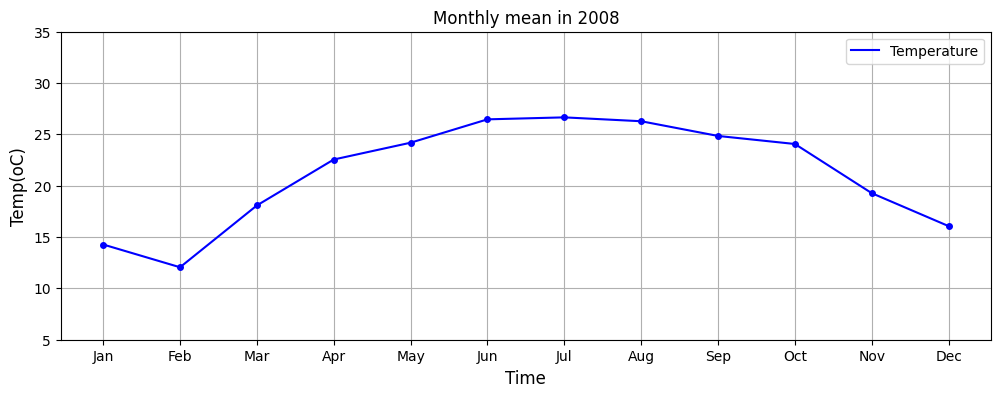

In [ ]:
#Exercise 2
#calculate monthly mean
mean_data = [np.nanmean(with_nan[i].tolist()) for i in range(len(with_nan))]
months = [date(2008,m,1).strftime('%b') for m in range(1,13)]

#plot
plt.figure(figsize = (12,4))
plt.plot(months, mean_data,color='b',marker="o", ms = 4)
plt.xticks(months)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Temp(oC)", fontsize = 12)
plt.grid(True)
plt.ylim(5,35)
legend = plt.legend(["Temperature"], scatterpoints = 1)
for handle in legend.legendHandles:
    handle.set_marker("")
plt.title('Monthly mean in 2008')
plt.savefig("Figure1_2.png")
plt.show()